<a href="https://colab.research.google.com/github/vishnucanada/COMP-348-Assignment-1/blob/main/a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from google.colab import files


uploaded = files.upload()
#Get our proper imports


Saving penguins.csv to penguins.csv


In [4]:
import io

df_penguins = pd.read_csv(io.BytesIO(uploaded['penguins.csv']))

#df_penguins = pd.read_csv(url)
#df_penguins = pd.read_csv('penguins.csv')
df_penguins.dtypes
# we observe the types so we can identify what needs to turned into one-hot vector


species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object

In [5]:
print(df_penguins['species'].unique())
print(df_penguins['island'].unique())
print(df_penguins['sex'].unique())
#We need to observe what certain types there are


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [6]:
ohe = OneHotEncoder()
one_hot_array = ohe.fit_transform(df_penguins[['species','island','sex']]).toarray()
#we turn given datatypes above into one hot vectors
one_hot_array

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [7]:
attributes = ohe.categories_

attributes

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['FEMALE', 'MALE'], dtype=object)]

In [8]:
penguins_labels = np.concatenate(attributes).flatten()
labels = []
for i in range(0,len(penguins_labels)):
    labels.append(penguins_labels[i])
labels

['Adelie',
 'Chinstrap',
 'Gentoo',
 'Biscoe',
 'Dream',
 'Torgersen',
 'FEMALE',
 'MALE']

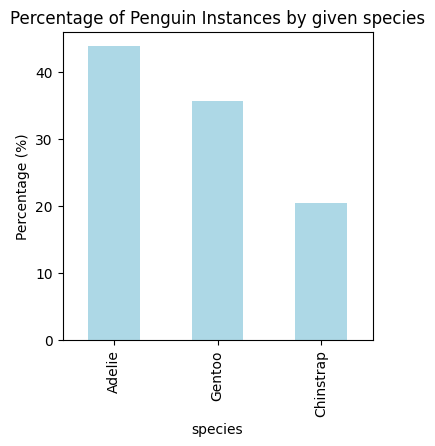

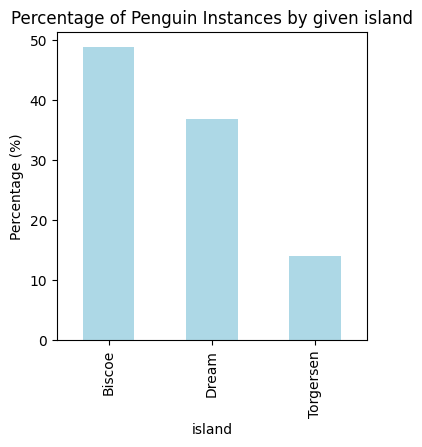

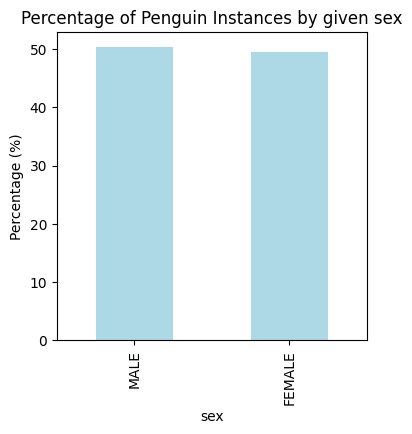

In [9]:
import matplotlib.pyplot as plt

feature = pd.DataFrame(one_hot_array,columns=labels)
def plot_on_given_attribute(attr):
    percentage_per_species = df_penguins[attr].value_counts(normalize=True) * 100
    plt.figure(figsize=(4, 4))
    percentage_per_species.plot(kind='bar', color='lightblue')
    plt.xlabel(attr)
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage of Penguin Instances by given {attr}')

for column in ['species','island','sex']:
    plot_on_given_attribute(column)
plt.show()

In [10]:
for any_attribute in df_penguins.columns:
    print(df_penguins[any_attribute].isna().sum())

0
0
0
0
0
0
0


In [11]:
from sklearn.model_selection import train_test_split

X, y = df_penguins[['island', 'sex','culmen_length_mm','culmen_depth_mm' ,'flipper_length_mm' ,'body_mass_g']], df_penguins["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(df_penguins))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))



333
249
84
249
84


In [14]:
uploaded = files.upload()
df_abalone = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
df_abalone.dtypes
# Remove any instance with missing features
df_abalone.dropna(inplace=True)

Saving abalone.csv to abalone.csv


In [15]:
ohe = OneHotEncoder()
one_hot_array = ohe.fit_transform(df_abalone[['Type']]).toarray()
#we turn given datatype above into one hot vectors
one_hot_array

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [16]:
attributes = ohe.categories_
attributes

[array(['F', 'I', 'M'], dtype=object)]

In [17]:
abalone_labels = np.concatenate(attributes).flatten()
labels = []
for i in range(0,len(abalone_labels)):
    labels.append(abalone_labels[i])
labels

['F', 'I', 'M']

In [19]:
for column in ['Type']:
    plot_on_given_attribute(column, df_abalone)
plt.show()

TypeError: ignored

In [20]:
# Separate data into features and target
features = df_abalone.iloc[:, 1:]
target = df_abalone.iloc[:, 0]
# Transform the categorical data into numerical values
le = preprocessing.LabelEncoder()
target = le.fit_transform(target)
# Split the dataset into training and testing set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)


NameError: ignored

In [21]:
def model_predictions(dt, features_test, target_test):
    predictions = dt.predict(features_test)

    # Per-class measures: precision and F1 value
    classes = df_abalone.columns[1:]  # Assuming the classes are in columns starting from index 1
    for class_idx, class_name in enumerate(classes):
        target_class = (target_test == class_idx)  # Create a binary target for the current class
        predictions_class = (predictions == class_idx)  # Create binary predictions for the current class

        precision = precision_score(target_class, predictions_class, zero_division = 0)
        f1 = f1_score(target_class, predictions_class, zero_division = 0)

        print(f"Class {class_name} - Precision: {precision}, F1-score: {f1}")


    # Multiclass classification of accuracy, precision and F1 value
    accuracy = accuracy_score(target_test, predictions)
    macro_avg_precision = precision_score(target_test, predictions, average = 'macro')
    macro_avg_f1 = f1_score(target_test, predictions, average = 'macro')
    weighted_avg_f1 = f1_score(target_test, predictions, average = 'weighted')
    print("Accuracy:", accuracy)
    print("Macro-average Precision:", macro_avg_precision)
    print("Macro-average F1:", macro_avg_f1)
    print("Weighted-average F1:", weighted_avg_f1)

In [22]:
# Base-DT
# Create, train and plot the Decision Tree Classifier
dt = tree.DecisionTreeClassifier(max_depth = 4) ################# max depth for visualization purpose so here or only when plotting
dt.fit(features_train, target_train)
tree.plot_tree(dt)
model_predictions(dt, features_test, target_test)

NameError: ignored

In [23]:
# TOP-DT
# Create, train and plot the Decision Tree Classifier
dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dt.fit(features_train, target_train)
tree.plot_tree(dt)

NameError: ignored